# imports and data loading 

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import celltypist
import anndata as ad
from scipy import sparse
from anndata import AnnData

/home/icb/leonie.pohl/mambaforge/envs/scanpy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/complete_merged_public_and_galapagos_qc_umap.h5ad")

In [5]:
all_marker_genes = {
  "AT1": ["S100a6", "Ager", "Pdpn", "Vegfa"],
  "AT2": ["Muc1", "Sftpc", "Sftpd", "Cxcl15", "Lcn2"],
  "Transitioning epithelial": ["Krt8", "Krt18"],
  "Epithelial": ["Epcam", "Cdh1"],
  "Alveolar macrophages": ["Marco", "Chil3", "Fabp4", "Siglecf", "Il18", "Ear1", "Fabp1", "Car4", "Ctsk", "Chil3", "S100a1", "Wfdc21", "Itgam", "Cd36", "Gpnmb", "Bhlhe41", "Klf9"],
    #"Litaf", "Jund", "Bhlhe40" , "Atf3", "Atf4"
  "Interstitial macrophages": ["Trem2", "C1qa"],
  "Classical monocytes": ["F13a1", "Ly6c2"],
  "Non-classical monocytes": ["Treml4", "Fcgr3"],
  "Dendritic cells": ["Clec9a", "H2-Aa"],
  "Dendritic cells pDC": ["Siglech", "Clec4b1"],#  Clec4b1 instead of Clec4c
  "Dendritic cells Ccr7-hi": ["Ccr7"],
  "CD4 T-cells": ["Cd4", "Cd3e", "Cd3d"],
  "CD8 T-cells": ["Cd8a", "Cd3d"],
  "NK cells": ["Tyrobp", "Gzma", "Nkg7"],
  "B-cells": ["Cd79a", "Cd19", "Ms4a1"],
  "Neutrophils": ["S100a8", "S100a9"],
  "Endothelial": ["Pecam1", "Ly6c1"], # Pecam1 instead of Pecam4
  "Lymphatic endothelial": ["Pdpn"],
  "Aerocytes": ["Car4", "Ednrb"],
  "Pericytes": ["Vtn", "Mcam", "Cspg4"],
  "Lipofibroblasts": ["Plin2", "Lpl", "Tcf21"],
  "Myofibroblasts": ["Cthrc1", "Spp1", "Pdgfra", "Col3a1", "Postn", "Tnc", "S100a6", "Ccl2"],
  "Alveolar fibroblast": ["Npnt", "Ces1d", "Slc7a10"],
  "Adventitial fibroblast": ["Pi16", "Dcn", "Il33", "Ccl11", "Adh7"],
  "Peribronchial fibroblasts": ["Hhip", "Aspn", "Fgf18", "Lgr5", "Lgr6"],
  "SMCs": ["Acta2", "Tagln", "Myh11"]
}
fibroblast_markers = {
  "Myofibroblasts": ["Cthrc1", "Spp1", "Pdgfra", "Col3a1", "Postn", "Tnc", "S100a6", "Ccl2"],
  "Alveolar fibroblast": ["Npnt", "Ces1d", "Slc7a10"],
  "Adventitial fibroblast": ["Pi16", "Dcn", "Il33", "Ccl11", "Adh7"],
  "Peribronchial fibroblasts": ["Hhip", "Aspn", "Fgf18", "Lgr5", "Lgr6"],
      "SMCs": ["Acta2", "Tagln", "Myh11"]

}

# harmonize manual annotation names

In [5]:
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Adventitial fibroblast"], "Adventitial fibroblasts")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Dendritic cell CCR7", "Dendritic cells pDC"], "Dendritic cells")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Interstitial Macrophage"], "Interstitial macrophages")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Na"], "NA")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["SMCS"], "SMCs")

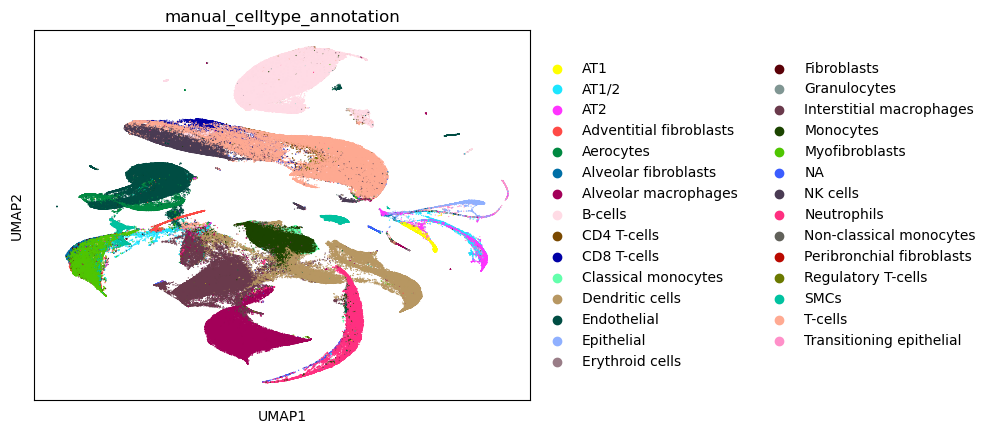

In [6]:
sc.pl.umap(adata, color=["manual_celltype_annotation"], size=3)

# Celltypist

In [7]:
alignment = celltypist.harmonize(adata, 'dataset', 'manual_celltype_annotation')

👀 Detected PCA coordinates in the object, will use these to calculate distances
🏆 Reordering datasets
🖇 Harmonizing cell types of misharin and tsukui
🖇 Harmonizing cell types of xie
🖇 Harmonizing cell types of schiller
🖇 Harmonizing cell types of peyser
🖇 Harmonizing cell types of galapagos_rad
🖇 Harmonizing cell types of galapagos_bleo
🖋️ Reannotating cells
✅ Harmonization done!


In [3]:
alignment = celltypist.DistanceAlignment.load("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/celltypist_alignment_on_all_data.pkl")

In [9]:
#alignment.write('/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/celltypist_alignment_on_all_data.pkl')

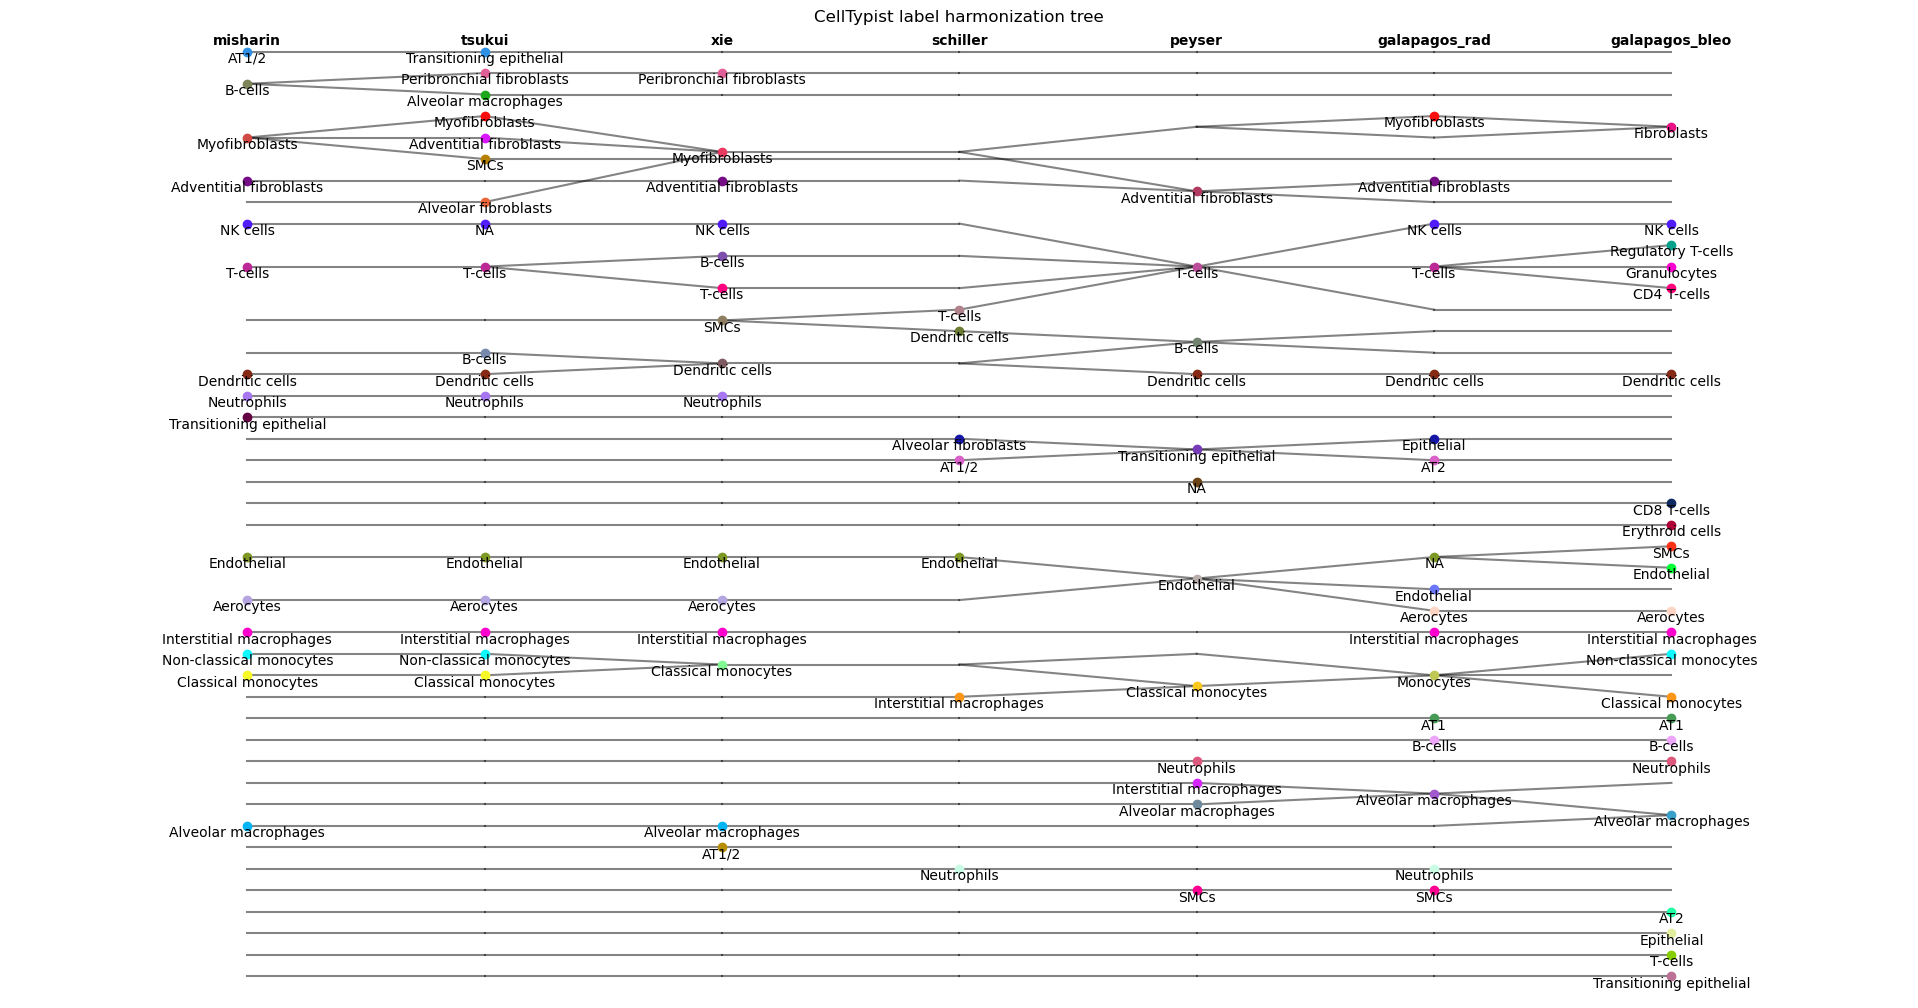

In [4]:
celltypist.treeplot(alignment)

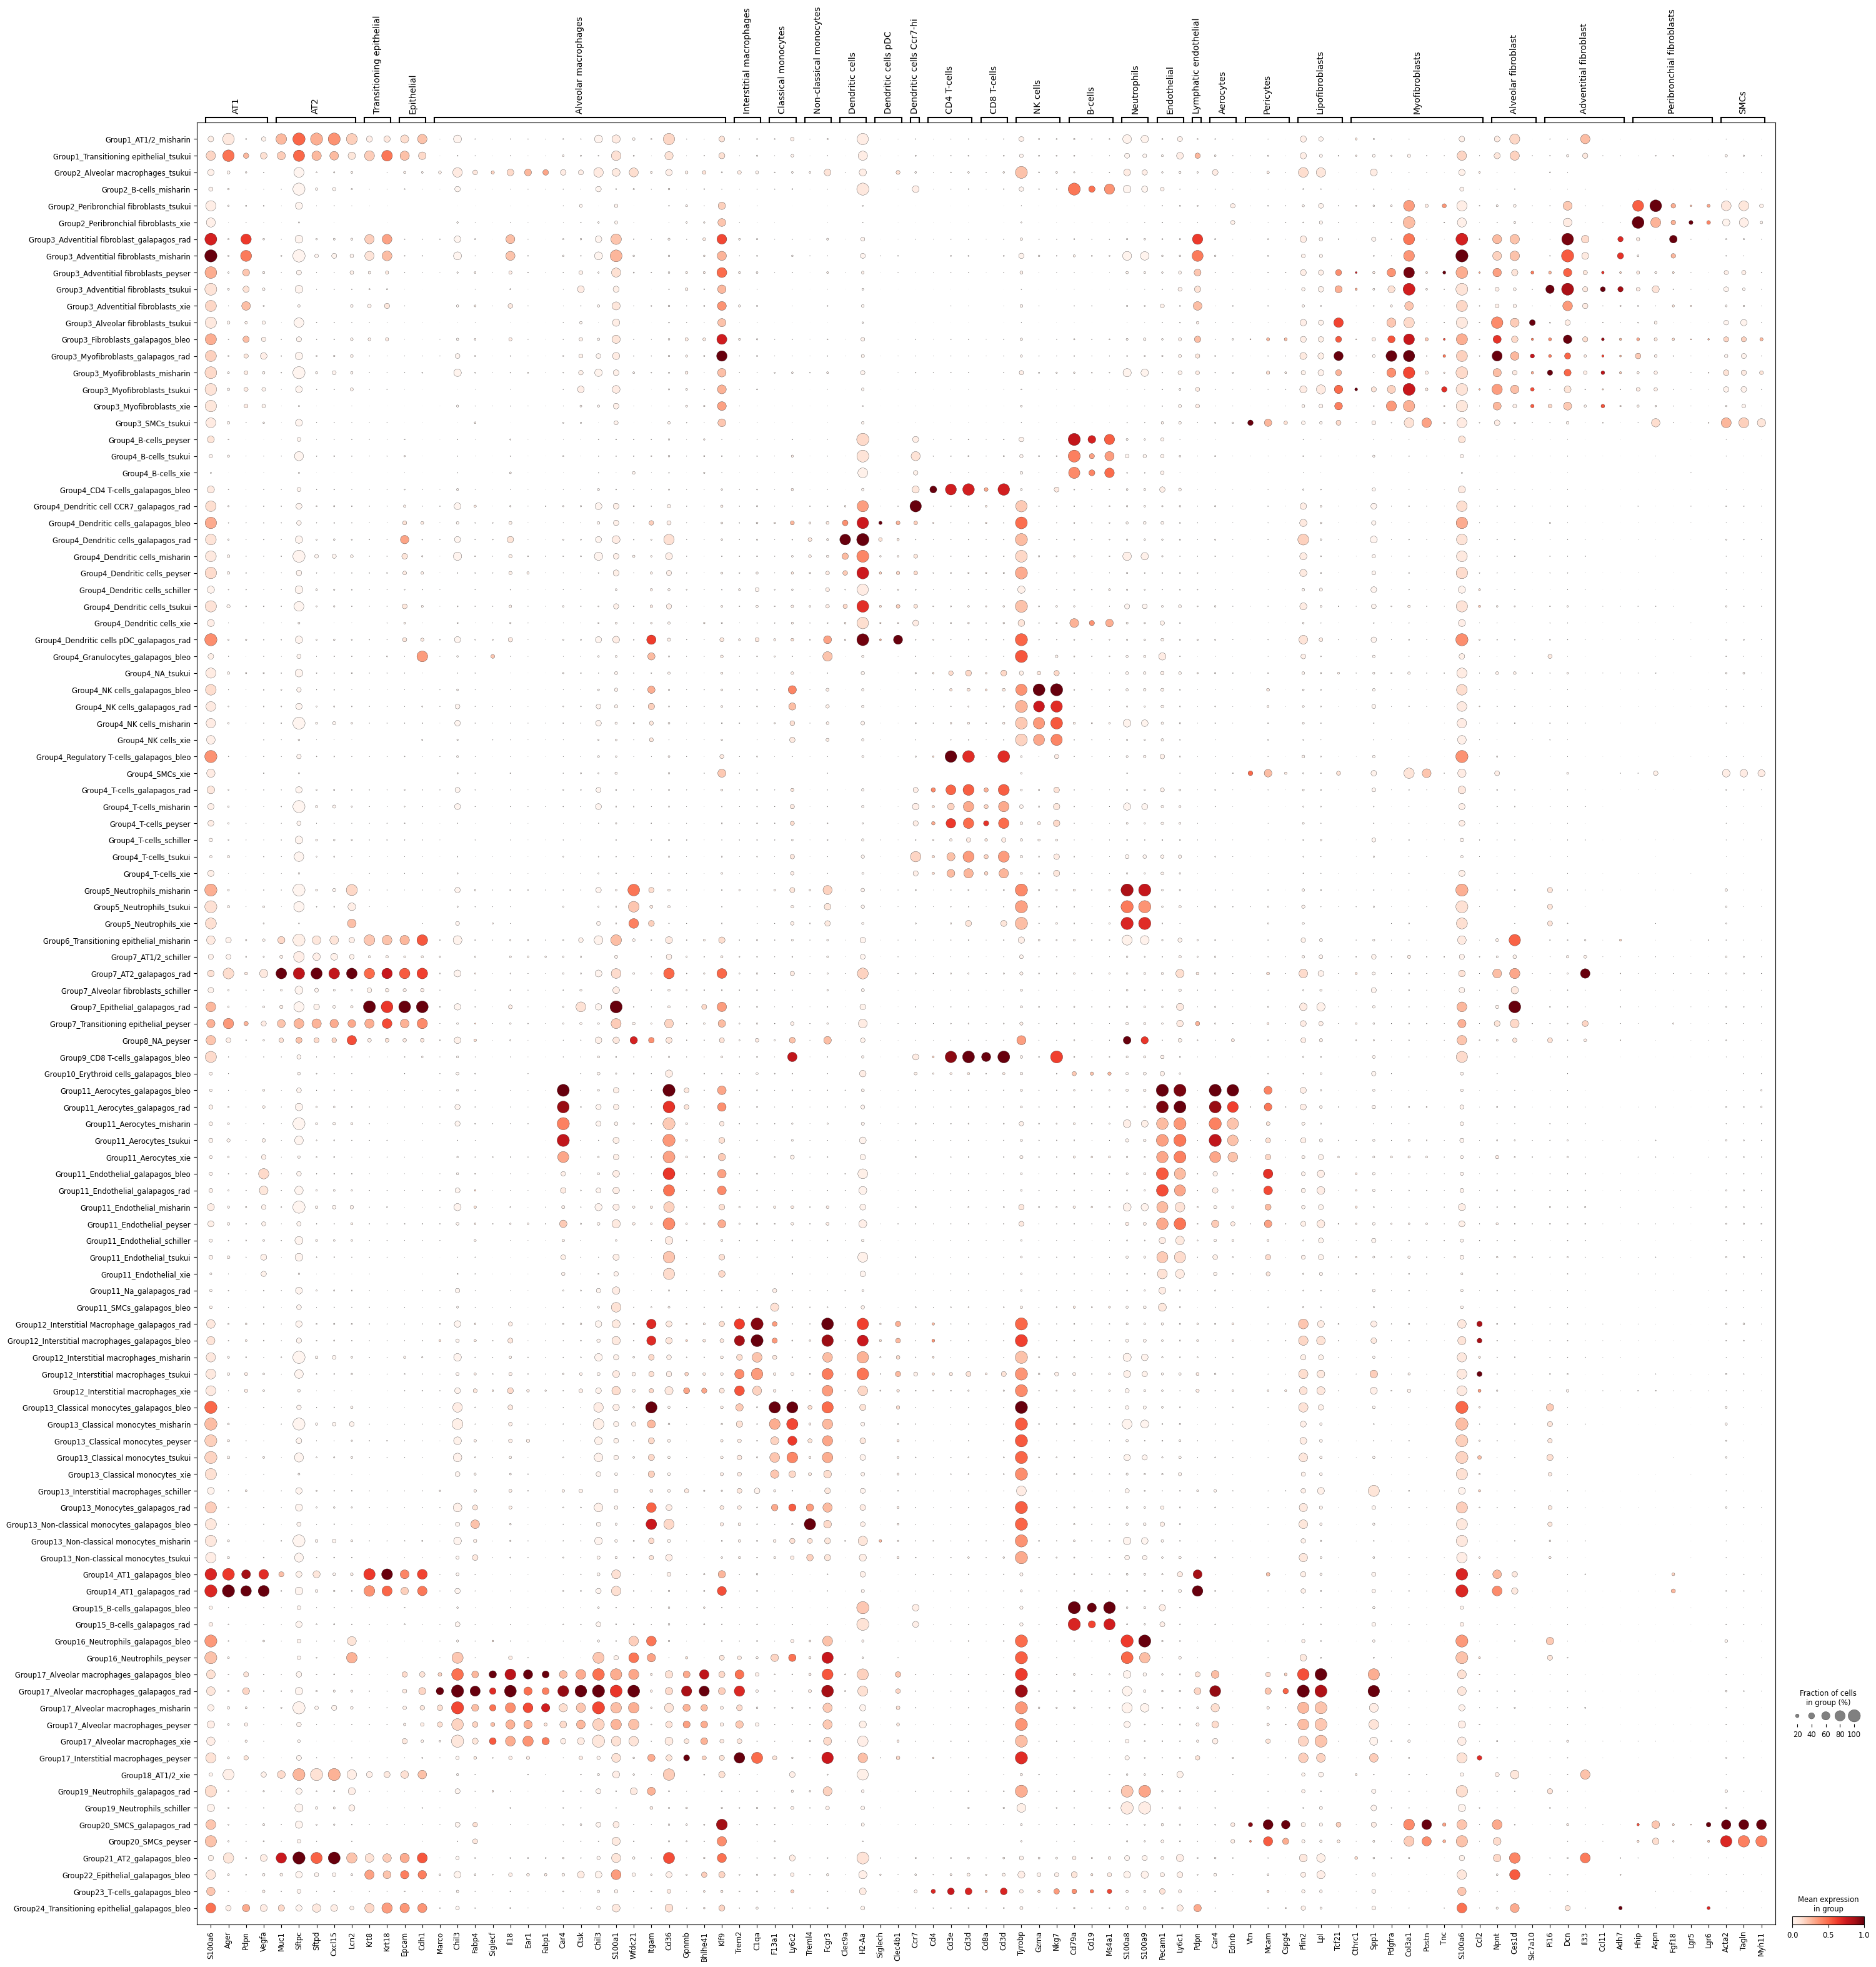

In [11]:
sc.pl.dotplot(adata, all_marker_genes, groupby=["celltypist_group", 'manual_celltype_annotation', "dataset" ], standard_scale="var")


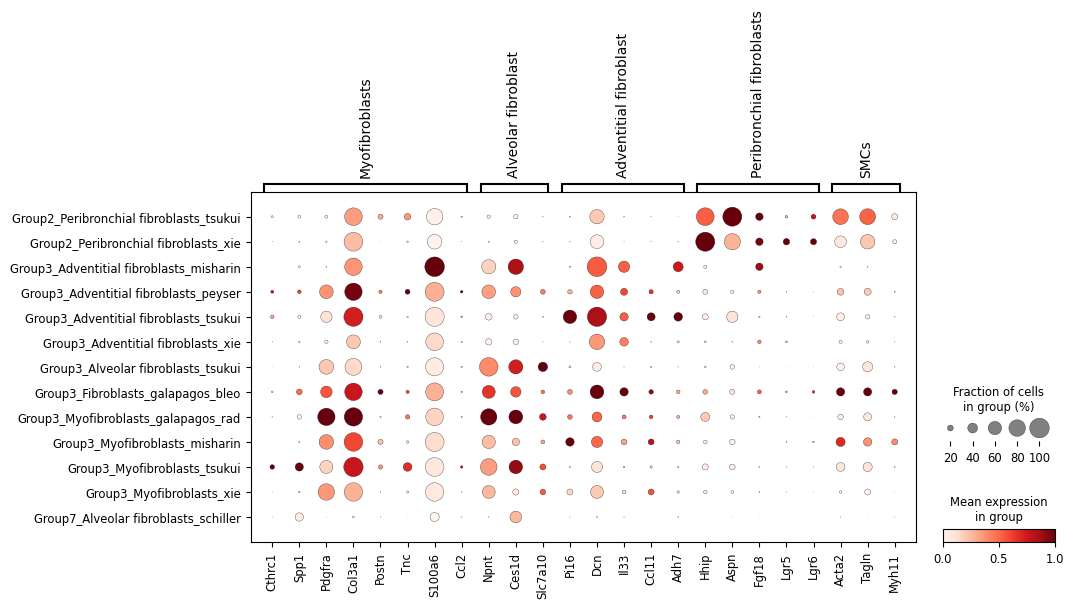

In [28]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["Fibroblasts", "Myofibroblasts", "Adventitial fibroblasts", "Alveolar fibroblasts", "Peribronchial fibroblasts" ])], fibroblast_markers, groupby=["celltypist_group", 'manual_celltype_annotation', "dataset" ], standard_scale="var")


In [7]:
adata.obs[['celltypist_group']] = alignment.reannotation.loc[adata.obs_names, ['group']]

In [ ]:
sc.pl.dotplot(adata, all_marker_genes, groupby=['manual_celltype_annotation', "dataset" ], standard_scale="var")



- group1_transitioning epithelial_tsukui --> AT1/2
- dendritic cell ccr7 --> dentritic cells
- dendtritic cells pdc --> dentritic cells
- schiller alveolar fibrobalst --> epithelial
- group 11 galapagos rad + bleo --> endothelial
- grou 22 galapagos bleo epithelial --> transitioning epithelial
- group 7 galapagos rad epithelial -->  transitioning  epithelial


Fibroblasts: 
- keep Peribronchial, and adventitial but: alveolar fibroblasts + myofibroblasts --> fibroblasts 
 



In [29]:
adata.obs["harmonized_anno"] = adata.obs["manual_celltype_annotation"]

In [30]:
# group1_transitioning epithelial_tsukui --> AT1/2
adata.obs.loc[(adata.obs['dataset'] == 'tsukui') &
       (adata.obs['celltypist_group'] == 'Group1') &
       (adata.obs['manual_celltype_annotation'] == 'Transitioning epithelial'),
       'harmonized_anno'] = 'AT1/2'

In [31]:
# dendritic cell ccr7 --> dentritic cells
adata.obs.loc[
       (adata.obs['manual_celltype_annotation'] == 'Dendritic cell CCR7'),
       'harmonized_anno'] = 'Dendritic cells'
# dendtritic cells pdc --> dentritic cells
adata.obs.loc[
       (adata.obs['manual_celltype_annotation'] == 'Dendritic cells pDC'),
       'harmonized_anno'] = 'Dendritic cells'

In [32]:
# schiller alveolar fibrobalst --> epithelial
adata.obs.loc[(adata.obs['dataset'] == 'schiller') &
       (adata.obs['manual_celltype_annotation'] == 'Alveolar fibroblasts'),
       'harmonized_anno'] = 'Epithelial'

In [33]:
# group 11 galapagos rad + bleo --> endothelial
adata.obs.loc[(adata.obs['dataset'] == 'galapagos_bleo') &
       (adata.obs['celltypist_group'] == 'Group11'),
       'harmonized_anno'] = 'Endothelial'

adata.obs.loc[(adata.obs['dataset'] == 'galapagos_rad') &
       (adata.obs['celltypist_group'] == 'Group11'),
       'harmonized_anno'] = 'Endothelial'

In [34]:
# group 22 galapagos bleo epithelial --> transitioning epithelial
adata.obs.loc[(adata.obs['dataset'] == 'galapagos_bleo') &
       (adata.obs['celltypist_group'] == 'Group22') &
       (adata.obs['manual_celltype_annotation'] == 'Epithelial'),
       'harmonized_anno'] = 'Transitioning epithelial'

In [35]:
# group 7 galapagos rad epithelial --> transitioning epithelial
adata.obs.loc[(adata.obs['dataset'] == 'galapagos_rad') &
       (adata.obs['celltypist_group'] == 'Group7') &
       (adata.obs['manual_celltype_annotation'] == 'Epithelial'),
       'harmonized_anno'] = 'Transitioning epithelial'

In [36]:
# keep Peribronchial, and adventitial but: alveolar fibroblasts + myofibroblasts --> fibroblasts

adata.obs['harmonized_anno'] = adata.obs['harmonized_anno'].replace('Myofibroblasts','Fibroblasts')
adata.obs['harmonized_anno'] = adata.obs['harmonized_anno'].replace('Alveolar fibroblasts','Fibroblasts')

In [52]:
alignment2 = celltypist.harmonize(adata, 'dataset', 'harmonized_anno')

👀 Detected PCA coordinates in the object, will use these to calculate distances
🏆 Reordering datasets
🖇 Harmonizing cell types of misharin and tsukui
🖇 Harmonizing cell types of xie
🖇 Harmonizing cell types of schiller
🖇 Harmonizing cell types of peyser
🖇 Harmonizing cell types of galapagos_rad
🖇 Harmonizing cell types of galapagos_bleo
🖋️ Reannotating cells
✅ Harmonization done!


In [54]:
alignment2.write('/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/celltypist_alignment_on_all_data_harmonized.pkl')

# Treeplot of harmonized anno 

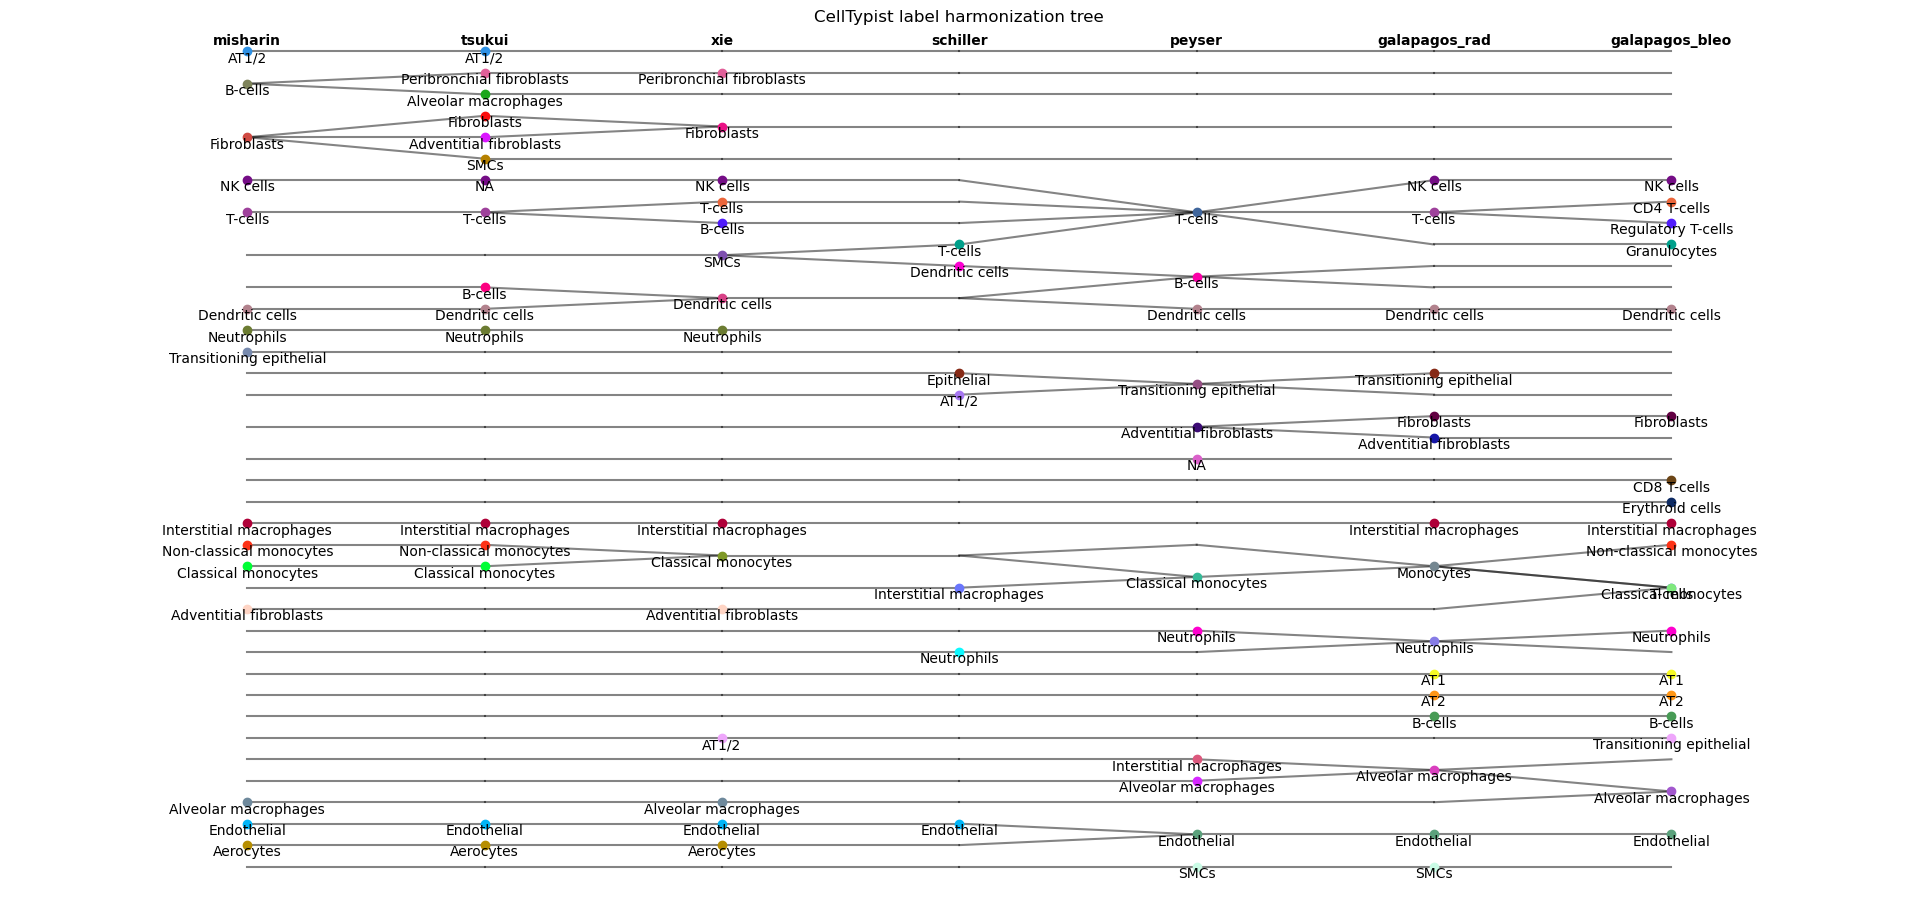

In [53]:
celltypist.treeplot(alignment2)

In [55]:
adata.write("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/complete_merged_public_and_galapagos_harmonized.h5ad")